## Analyzing Developers on Stack Overflow

## Introduction

Stack Overflow is an online community for developers to ask questions, write answer, and search for answers of their programming problem. It’s a platform for developers to learn and share their knowledge with others. Developers can earn reputation and receive “badge” by writing helpful answer for other developers’ programming problems. It also provides a job section for developers to find their next opportunities, and for employers to list their openings of different developer roles.

The Stack Overflow conducted annual developer survey since 2011. The purpose of this survey is to share information of technology and current state of industry with developers. It also helps Stack Overflow to educate their employers to get to know the developers about what they think and what they want.


This project aims to analyze the gender problems of developers on Stack Overflow from multiple perspectives, by conducting quantitative analysis.

### Background/Related Work:


The tech industry has gender diversity problem, which is not a secret. Men vastly outnumber women in developer jobs, where much of the power in the industry is located. Gender disparity in tech jobs is wide and deep. It exists at U.S., European and Asian companies. Female tech entrepreneurs also get far less venture capital than startups led by men.

Although girls in high school outperform boys in math and science, boys are more likely to take the tests that lead to a college major in STEM subjects. One study showed women in college tended to steer clear of those science and engineering majors since they think they should be brilliant, smart enought to succeed in the tech field after graduate. Women also leave high-tech jobs at twice the rate of men, which forms a unique trend and environment on the culture of tech workplaces.

Stack Overflow, as the largest online community for developers, represents the current state of the developers worldwide from some circumstance. We can take a closer look at how women and men different in race, developer rols and education, by analyzing StackOverflow Developer Survey data. 

## Methods

The research questions to ask are listed below:

- What is the distribution of StackOverflow developers by gender?
- What is the difference of developers' Race between men and women?
- What is the difference of developers' roles between men and women?
- What is the difference of developers' activities on StackOverflow between men and women?

All research questions above are to compare the difference between male and female developers on StackOverflow. Using a bar chart is the most straightforward way to compare the differences.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Get the Data

The Stack Overflow Developer Survey, 2017 data was downloaded from Kaggle website as .csv file.

In [5]:
# Read .csv file with pandas dataframe
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Get the dimension of the data
df.shape

(51392, 154)

### Data Cleaning

Respondents suppossed to only choose one option for somme survey questions, like gender, race, and etc. For answers including multiple options are considered as invalid answers. We will delete those answers and not include them into the analysis

In [11]:
# Delet invalid rows under gender, only keep 5 categories under gender, male, female, other, gender non-conforming, transgender
df['Gender'].value_counts()
gender_list = ['Male', 'Female', 'Other', 'Gender non-conforming', 'Transgender']
df_gender = df[df.Gender.isin(gender_list)]
df_gender['Gender'].value_counts()

Male                     31589
Female                    2600
Other                      225
Gender non-conforming      160
Transgender                 55
Name: Gender, dtype: int64

In [12]:
# Delet invalid rows under race, only keep 8 categories under rance, "White or of European descent","South Asian", 
#"Hispanic or Latino/Latina", "East Asian", "Middle Eastern", "I prefer not to say", "Black or of African descent",
#"I don’t know"
df['Race'].value_counts()
race_list = ['White or of European descent', 'South Asian', 'Hispanic or Latino/Latina', 'East Asian', 
             'Middle Eastern', 'I prefer not to say', 'Black or of African descent', 'I don’t know']
df_gender = df_gender[df_gender.Race.isin(race_list)]
df_gender['Race'].value_counts()

White or of European descent    23048
South Asian                      2628
Hispanic or Latino/Latina        1274
East Asian                       1262
Middle Eastern                    890
I prefer not to say               741
Black or of African descent       638
I don’t know                      501
Name: Race, dtype: int64

In [44]:
# We only include in some main types of developers and delete the rest of the developer types
alldev_list = ['Web developer', 'Desktop applications developer', 'Mobile developer', 'DevOps specialist', 
               'Embedded applications/devices developer', 'Database administrator', 'Developer with a statistics or mathematics background',
              'Systems administrator', 'Data scientist', 'Graphic designer', 'Quality assurance engineer', 'Machine learning specialist',
            ]
df_gender = df_gender[df_gender.DeveloperType.isin(alldev_list)]
df_gender['DeveloperType'].value_counts()

Web developer                                            6728
Desktop applications developer                            949
Mobile developer                                          898
Embedded applications/devices developer                   412
Developer with a statistics or mathematics background     285
Data scientist                                            119
DevOps specialist                                         109
Quality assurance engineer                                 50
Database administrator                                     35
Machine learning specialist                                21
Systems administrator                                      11
Graphic designer                                            1
Name: DeveloperType, dtype: int64

### What is the distribution of StackOverflow developers by gender?

In [53]:
#Create a new data frame with total number and ratio of male developers, female developers, and etc.
df_gender['Gender'].value_counts()
df_gd = df_gender['Gender'].value_counts().to_frame()
df_gd['Percentage'] = df_gd['Gender']/np.sum(df_gd['Gender'])
df_gd

,Gender,Percentage
Male,8697,0.904242
Female,849,0.088272
Other,34,0.003535
Gender non-conforming,27,0.002807
Transgender,11,0.001144


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

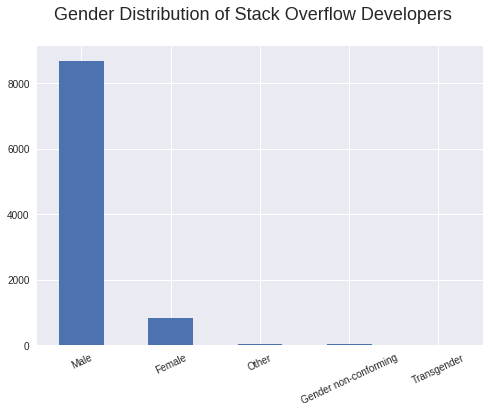

In [56]:
# Create figure for gender distribution of StackOverflow developers
df_gender['Gender'].value_counts().plot(kind='bar')
plt.suptitle('Gender Distribution of Stack Overflow Developers', fontsize=18)
plt.xticks(rotation=25)

From the table and the figure above, the percentage of male developers is 90.42%, which is greatly higher than the percentage of female developers, 8.8%. The male developers represent the vast majority of contributores on StackOverflow. 

### What is the difference between developers' Race in men and women?

In [57]:
#Create dataframes that contain male and female seperately
df_m = df_gender.loc[df_gender['Gender'] == 'Male']
df_f = df_gender.loc[df_gender['Gender'] == 'Female']

#Select “Race” columns from different dataframes and create a new dataframe
df_race_f = df_f['Race'].value_counts().to_frame()
df_race_m = df_m['Race'].value_counts().to_frame()
df_gender_race = pd.DataFrame({'Male': df_race_m['Race'], 'Female': df_race_f['Race']})
df_gender_race

,Female,Male
Black or of African descent,20,130
East Asian,61,323
Hispanic or Latino/Latina,32,346
I don’t know,9,116
I prefer not to say,18,169
Middle Eastern,20,214
South Asian,85,811
White or of European descent,604,6588


In [30]:
# Add male ratio and female ratio to the dataframe
df_gender_race['Female Ratio'] = df_gender_race['Female']/np.sum(df_gender_race['Female']+df_gender_race['Male'])
df_gender_race['Male Ratio'] = df_gender_race['Male']/np.sum(df_gender_race['Female']+df_gender_race['Male'])
df_gender_race

,Female,Male,Female Ratio,Male Ratio
Black or of African descent,20,130,0.002095,0.013618
East Asian,61,323,0.006390,0.033836
Hispanic or Latino/Latina,32,346,0.003352,0.036246
I don’t know,9,116,0.000943,0.012152
I prefer not to say,18,169,0.001886,0.017704
Middle Eastern,20,214,0.002095,0.022418
South Asian,85,811,0.008904,0.084957
White or of European descent,604,6588,0.063273,0.690132


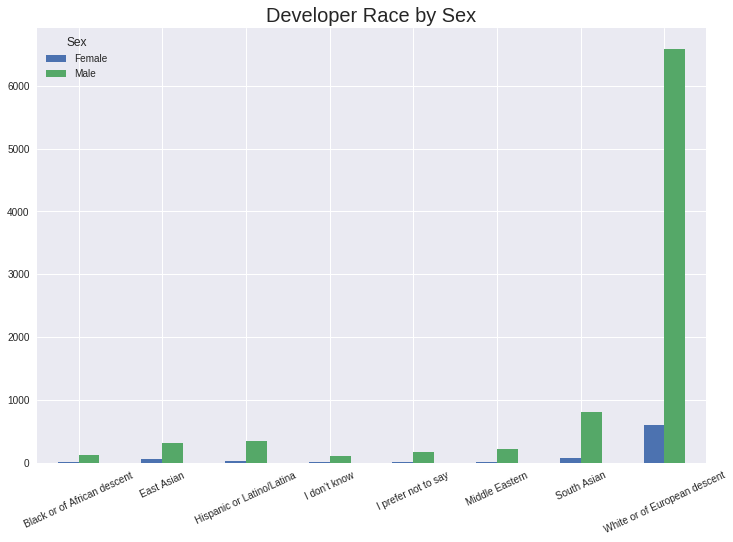

In [34]:
# Plot figure and add index as label
df_figure = pd.DataFrame(df_gender_race,
                 index=['Black or of African descent','East Asian', 'Hispanic or Latino/Latina',
                                                'I don’t know', 'I prefer not to say','Middle Eastern',
                       'South Asian', 'White or of European descent'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('Developer Race by Sex', fontsize=20)
plt.xticks(rotation=25)

plt.show()

From the figure above, 75% of developers is "White and European descent". 6.3% developers are white women. East Asian and south asian can be considered as within the same category "Asian". Thus, 21% of developers is "Asian" and 1.5% is asian women. 

### What is the difference between developers' roles for men and women?

In [32]:
#Create dataframes that contain male and female seperately
df_m = df_gender.loc[df_gender['Gender'] == 'Male']
df_f = df_gender.loc[df_gender['Gender'] == 'Female']

#Select “Developer type” columns from different dataframes and create a new dataframe
df_dev_f = df_f['DeveloperType'].value_counts().to_frame()
df_dev_m = df_m['DeveloperType'].value_counts().to_frame()
df_gender_dev = pd.DataFrame({'Male': df_dev_m['DeveloperType'], 'Female': df_dev_f['DeveloperType']})
df_gender_dev

,Female,Male
Data scientist,14.0,104
Database administrator,5.0,30
Desktop applications developer,63.0,879
DevOps specialist,5.0,104
Developer with a statistics or mathematics background,28.0,257
Embedded applications/devices developer,20.0,387
Graphic designer,NaN,1
Machine learning specialist,NaN,21
Mobile developer,89.0,803
Quality assurance engineer,9.0,41


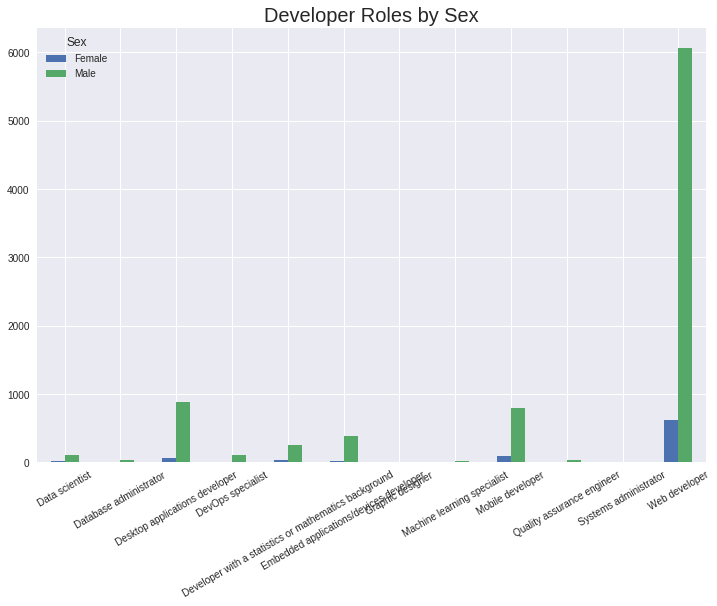

In [33]:
# Plot figure and add index as label
df_figure = pd.DataFrame(df_gender_dev,
                 index=['Data scientist','Database administrator', 'Desktop applications developer','DevOps specialist', 'Developer with a statistics or mathematics background',
                       'Embedded applications/devices developer', 'Graphic designer', 'Machine learning specialist', 'Mobile developer',
                       'Quality assurance engineer', 'Systems administrator', 'Web developer'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=30)
plt.title('Developer Roles by Sex', fontsize=20)

plt.show()

From the figure and table above, among all developer roles, most respndents on StackOverflow are web developers. It has 6061 male developers and 615 female developers. The amount of web developers is far more than other developer roles, since web developers include backend developer, frontend developer and full stack developers. desktop developer and mobile developer are also included in top 3 developer roles. The Distribution of different developer roles among men and women is very simialr. However, female developers with a statistics or mathematics background and data scientist are proportionally higher than male. 

## What is the difference of developers' activities on StackOverflow between men and women?


In [59]:
# Select columns relate to users' activities
df1 = df_gender[['Gender', 'StackOverflowFoundAnswer', 'StackOverflowCopiedCode', 'StackOverflowJobListing', 
                 'StackOverflowCompanyPage', 'StackOverflowJobSearch', 'StackOverflowNewQuestion',
                'StackOverflowAnswer', 'StackOverflowMetaChat']]
df1.head()

,Gender,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat
7,Male,Once or twice,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Several times,Haven't done at all
13,Female,Several times,Several times,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Several times,Haven't done at all
14,Male,Several times,Once or twice,Several times,Several times,Several times,Once or twice,At least once each day,Several times
15,Male,At least once each week,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Once or twice,Once or twice
16,Male,Several times,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all


In [62]:
# Create new datafram to plot "How Often People Find answer of Their Coding Problem?"
df_male = df1.loc[df1['Gender'] == 'Male']
df_female = df1.loc[df1['Gender'] == 'Female']
df_answer_fm = df_female['StackOverflowFoundAnswer'].value_counts().to_frame()
df_answer_m = df_male['StackOverflowFoundAnswer'].value_counts().to_frame()
df_index1 = pd.DataFrame({'Male': df_answer_m['StackOverflowFoundAnswer'], 'Female': df_answer_fm['StackOverflowFoundAnswer']})
df_index1

,Female,Male
At least once each week,336,3327
Several times,280,3033
At least once each day,142,1351
Once or twice,53,598
Haven't done at all,6,104


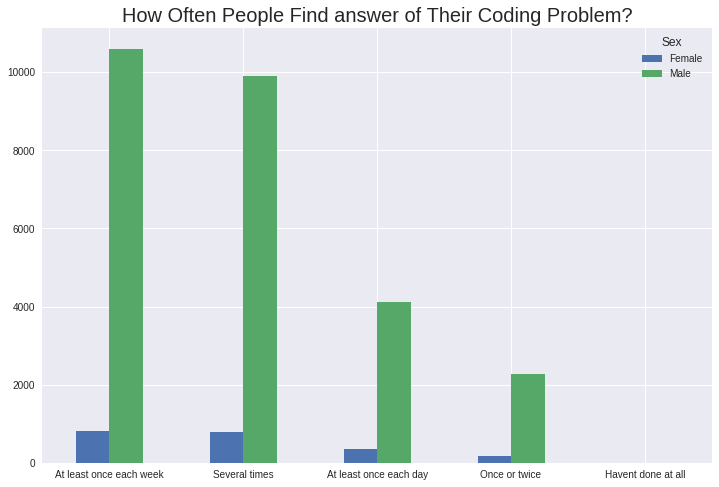

In [71]:
df_figure = pd.DataFrame(df_index1,
                 index=['At least once each week','Several times', 'At least once each day',
                                                'Once or twice', 'Havent done at all'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('How Often People Find answer of Their Coding Problem?', fontsize=20)

plt.show()

In [63]:
# Create new datafram to plot "How Often People Copied a code example and pasted it into their codebase?"
df_copy_fm = df_female['StackOverflowCopiedCode'].value_counts().to_frame()
df_copy_m = df_male['StackOverflowCopiedCode'].value_counts().to_frame()
df_index2 = pd.DataFrame({'Male': df_copy_m['StackOverflowCopiedCode'], 'Female': df_copy_fm['StackOverflowCopiedCode']})
df_index2

,Female,Male
At least once each day,22,242
At least once each week,110,936
Haven't done at all,166,2048
Once or twice,249,2570
Several times,253,2526


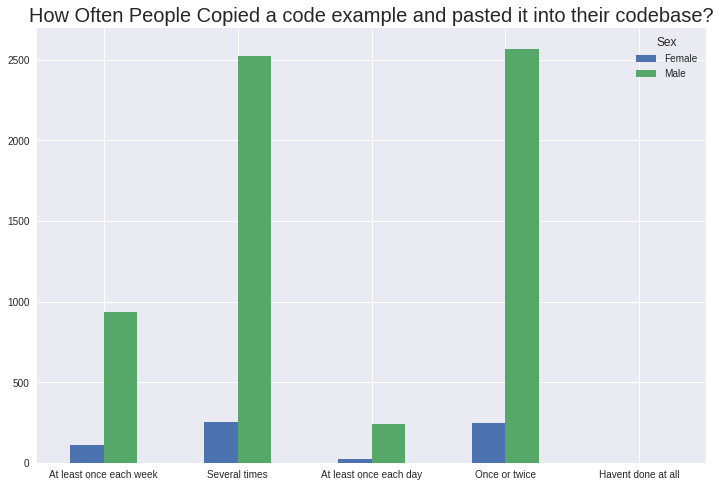

In [64]:
df_figure = pd.DataFrame(df_index2,
                 index=['At least once each week','Several times', 'At least once each day',
                                                'Once or twice', 'Havent done at all'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('How Often People Copied a code example and pasted it into their codebase?', fontsize=20)

plt.show()

In [74]:
# Create new datafram to plot "How Often People Asked a New Question?"
df_question_fm = df_female['StackOverflowNewQuestion'].value_counts().to_frame()
df_question_m = df_male['StackOverflowNewQuestion'].value_counts().to_frame()
df_index3 = pd.DataFrame({'Male': df_question_m['StackOverflowNewQuestion'], 'Female': df_question_fm['StackOverflowNewQuestion']})
df_index3


,Female,Male
Haven't done at all,1522,16654
Once or twice,391,6812
Several times,160,3017
At least once each week,26,319
At least once each day,5,92


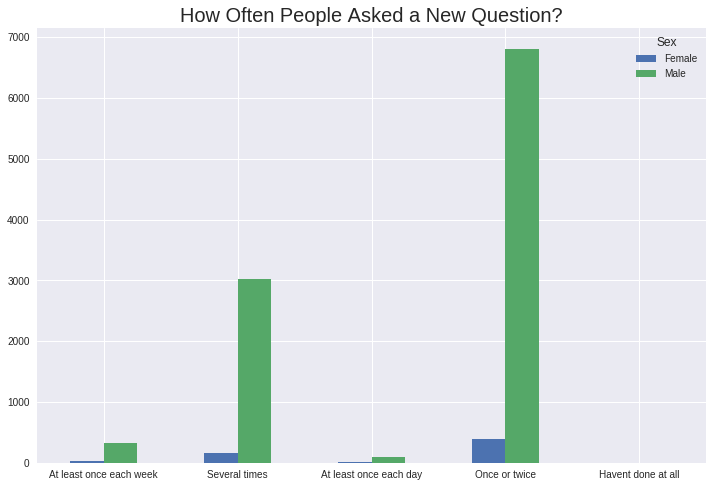

In [75]:
df_figure = pd.DataFrame(df_index3,
                 index=['At least once each week','Several times', 'At least once each day',
                                                'Once or twice', 'Havent done at all'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('How Often People Asked a New Question?', fontsize=20)

plt.show()

In [65]:
# Create a new dataframe to plot "How Often People Wrote a New Answer to Someone Else Question?"
df_answer_fm = df_female['StackOverflowAnswer'].value_counts().to_frame()
df_answer_m = df_male['StackOverflowAnswer'].value_counts().to_frame()
df_index4 = pd.DataFrame({'Male': df_answer_m['StackOverflowAnswer'], 'Female': df_answer_fm['StackOverflowAnswer']})
df_index4

,Female,Male
Haven't done at all,588,4759
Once or twice,123,1912
Several times,62,1145
At least once each week,14,329
At least once each day,4,92


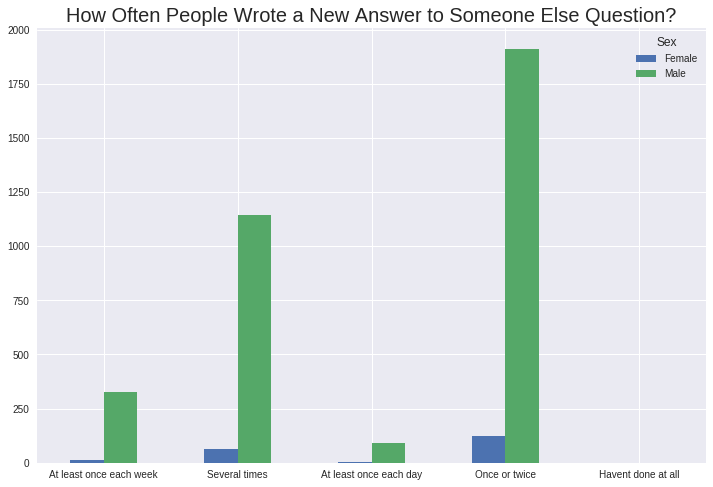

In [66]:
df_figure = pd.DataFrame(df_index4,
                 index=['At least once each week','Several times', 'At least once each day',
                                                'Once or twice', 'Havent done at all'],
                 columns=pd.Index(['Female', 'Male'], 
                 name='Sex')).round(2)


df_figure.plot(kind='bar',figsize=(12,8))

ax = plt.gca()
pos = []
for bar in ax.patches:
    pos.append(bar.get_x()+bar.get_width()/2.)


ax.set_xticks(pos,minor=True)
lab = []
for i in range(len(pos)):
    l = df.columns.values[i//len(df.index.values)]
    lab.append(l)

plt.setp(ax.get_xticklabels(), rotation=0)
plt.title('How Often People Wrote a New Answer to Someone Else Question?', fontsize=20)

plt.show()

## Findings


After analyzing the survey data, male represents the vast majority of contributors on Stack Overflow. The percentage of female on Stack Overflow is 7.51%, but 26% of professional computing occupations in the 2016 U.S. workforce held by women according to NCWIT (National Center for Woman & Information Technology). The percentage of  Asian female on Stack Overflow is 1.28%, but 5% Asian female of professional computing occupations by NCWIT. The percentage of African-American female on Stack Overflow is 1.69%, but 3% by NCWIT. While the sample as a whole skewed heavily male, women were proportionally more represented among mobile and web developers, developers with mathematics and statistics background and data scientist.

Moreover, Users on Stack Overflow frequently searching for an answer of coding problem rather than posting a new question. Woman were proportionally more preferable to copy a code example into their codebases. Woman were proportionally more likely to ask new questions. Man were more likely to answer a new question.


## Limitation

Many unregistered users search for answers on Stack Overflow without identifying themselves. 

The data is self-reported. We assume that all respondents are honest. 

A bunch of developers from non-English speaking countries do not use Stack Overflow due to language. It may influence the accracy of developers' race.

## Conclusion

Male represent the vast majority of contributors to Stack Overflow. Also, Male participate more to search answers, answer questions, and engage in the community more than female do.

The representation of gender and ethnicity in Stack Overflow Developer Survey 2017 exists bias, which cannot represent the current state of developers.

## References

Roose, Kevin. “Survey Says: 92 Percent of Software Developers Are Men.” Splinter, Splinternews.com, 8 Apr. 2015, splinternews.com/survey-says-92-percent-of-software-developers-are-men-1793846921.

“Google's Gender Problem Is Actually a Tech Problem.” Fortune, fortune.com/2017/08/08/google-gender-struggle-tech/.

Vasilescu, Bogdan, et al. “Gender, Representation and Online Participation: A Quantitative Study of StackOverflow.” 2012 International Conference on Social Informatics, 2012, doi:10.1109/socialinformatics.2012.81.